Load the dataset and display its shape.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read Data
mnist_train = pd.read_csv("mnist_train.csv")
mnist_test = pd.read_csv("mnist_test.csv")

#Print Shape Of Train
print("Train Shape: ",  mnist_train.shape)
print("Train Rows: ",mnist_train.shape[0])
print("Train Columns: ",mnist_train.shape[1])

#Print Shape Of Test
print("Test Shape: ",  mnist_test.shape)
print("Test Rows: ",mnist_test.shape[0])
print("Test Columns: ",mnist_test.shape[1])

Train Shape:  (60000, 785)
Train Rows:  60000
Train Columns:  785
Test Shape:  (10000, 785)
Test Rows:  10000
Test Columns:  785


Print head to see the general shape of the data.

In [69]:
print(mnist_train.head(1))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  

[1 rows x 785 columns]


Are there are NaN values in the dataset?

In [70]:
print(mnist_train.isna().any().any())

False


Data is totally clean in this case (since the final result says False which means it has no missing values)
There is no empty field.

In [71]:
mnist_train_labels = mnist_train.iloc[:,0]
mnist_test_labels = mnist_test.iloc[:, 0]

mnist_train_images = mnist_train.reset_index(drop=True)
mnist_test_images = mnist_test.reset_index(drop=True)

mnist_train_images = mnist_train_images.drop('label',axis = 1)
mnist_test_images = mnist_test_images.drop('label',axis = 1)

mnist_train_images = mnist_train_images.values
mnist_test_images = mnist_test_images.values

mnist_test_labels = mnist_test_labels.values
mnist_train_labels = mnist_train_labels.values

def display_image(image_ind):
  x = (mnist_train_images[image_ind])
  xx = x
  xx = xx.astype('uint8')
  xx = np.reshape(xx, (28, 28))
  plt.imshow(xx)
  print("Label = ",mnist_train_labels[image_ind])
  plt.show()

Label =  5


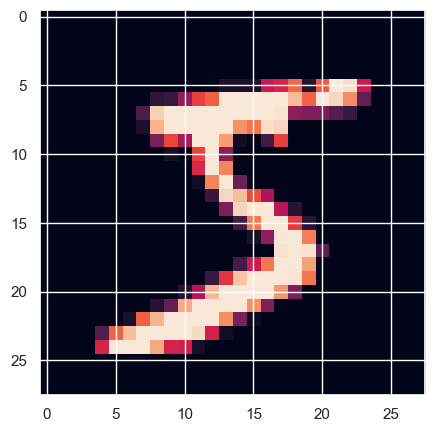

Label =  0


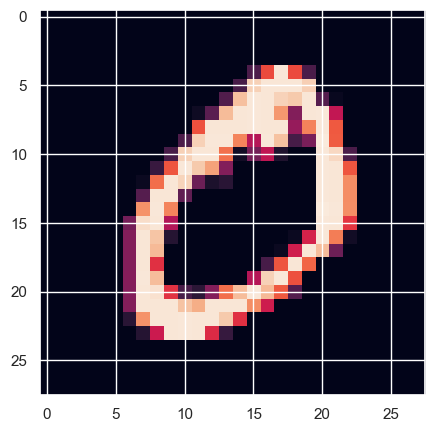

Label =  4


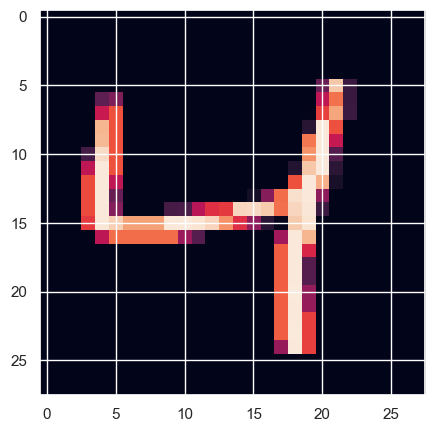

Label =  1


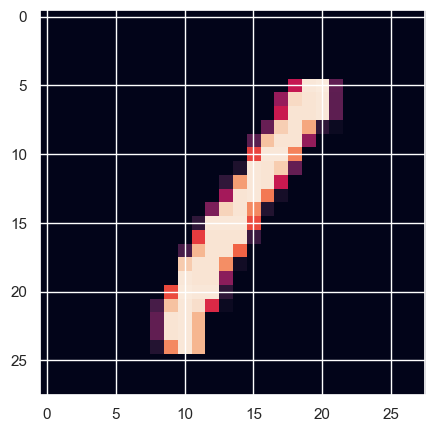

In [72]:
for i in range(4):
  display_image(i)

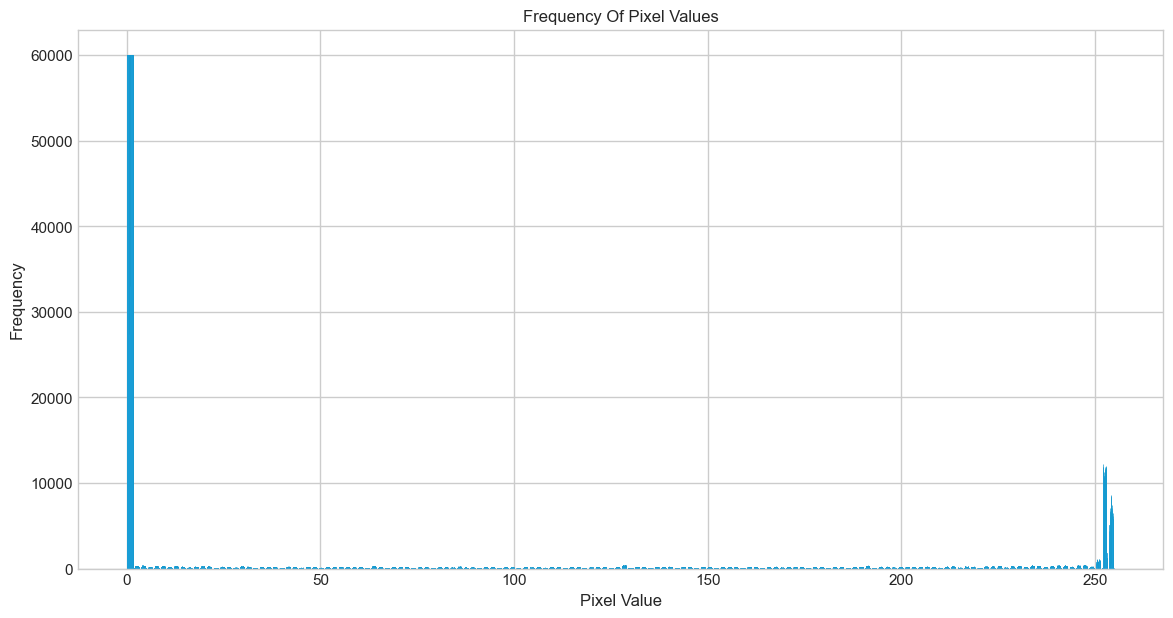

In [73]:
# unique, counts = np.unique(mnist_train_images, return_counts=True)
plt.figure(figsize=(14, 7))  # Make it 14x7 inch
plt.style.use('seaborn-whitegrid')  # nice and clean grid
plt.hist(mnist_train_images, bins=150, facecolor='#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Frequency Of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

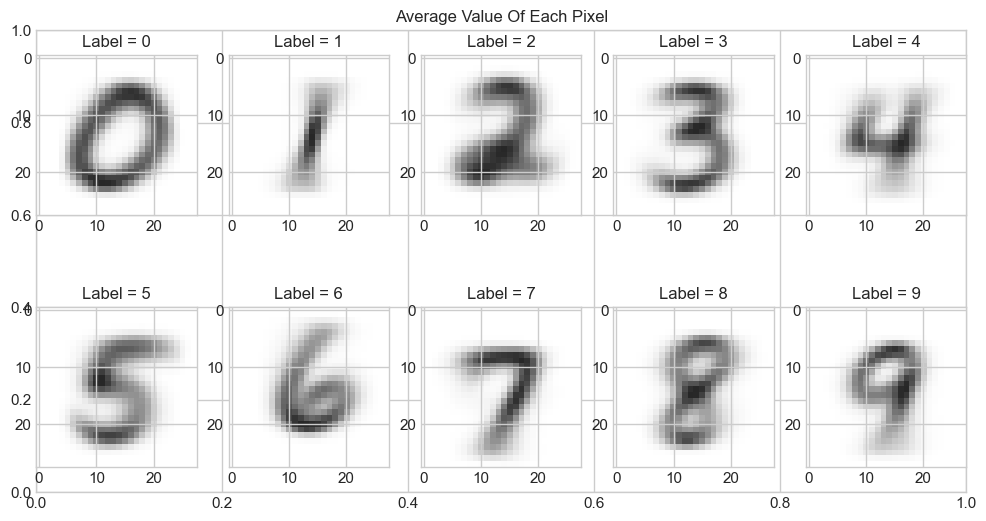

In [74]:
#Average Pixel Value

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
centroid = np.mean(mnist_train_images, axis=0)
distances = np.linalg.norm(mnist_train_images - centroid, axis=1)

divide_pixels_by_labels = []
for i in labels:
    temp=[]
    for j  in range(len(distances)):
        if i == mnist_train_labels[j]:
            temp.append(mnist_train_images[j])
    divide_pixels_by_labels.append(temp)

fkme4 = []
fkme5 = []
fig3 = plt.figure(figsize=(12, 6))
for i in range(10):
    centroid_temp = np.mean(divide_pixels_by_labels[i], axis=0)
    xx = centroid_temp.astype('uint8')
    xx = np.reshape(xx, (28, 28))
    fkme4.append(xx)
    fkme5.append(i)

ax1 = []
# print(len(fkme4))
plt.title("Average Value Of Each Pixel")
for i in range(10):
    ax1.append(fig3.add_subplot(2, 5, i+1))
    ax1[-1].set_title("Label = " + str(fkme5[i]))  # set title
    # print("f")
    plt.imshow(fkme4[i], alpha = 0.85)
plt.show()


In [75]:
#Here, we are going to consider the Euclidean distance (square root of the sum of squares) of each image to its label’s centroid and find the ones straying the furthest away from the average.
centroid = np.mean(mnist_train_images, axis = 0)
distances = np.linalg.norm(mnist_train_images - centroid, axis=1)

In [76]:
distances2 = []
for j in labels:
    temp = []
    for i in range(len(distances)):
        if j == mnist_train_labels[i]:
            temp.append(distances[i])
    distances2.append(temp)


[Text(0.5, 0, 'Digit'), Text(0, 0.5, 'Distance From The Mean Pixel Value')]

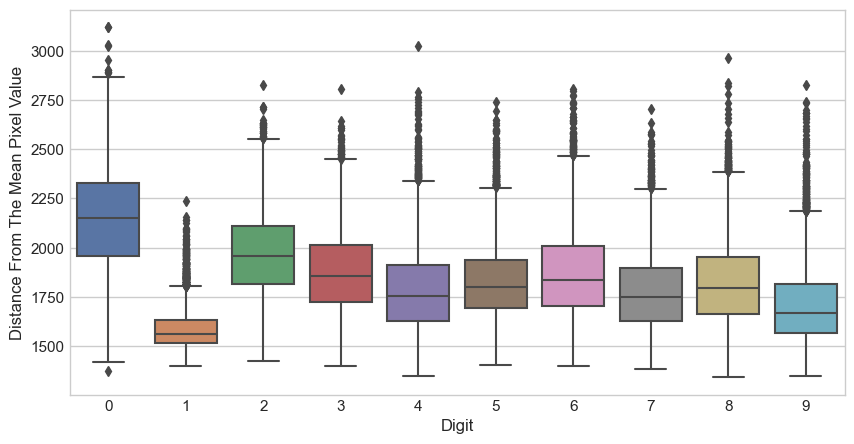

In [77]:
sns.boxplot(data=distances2).set(xlabel='Digit',ylabel='Distance From The Mean Pixel Value')

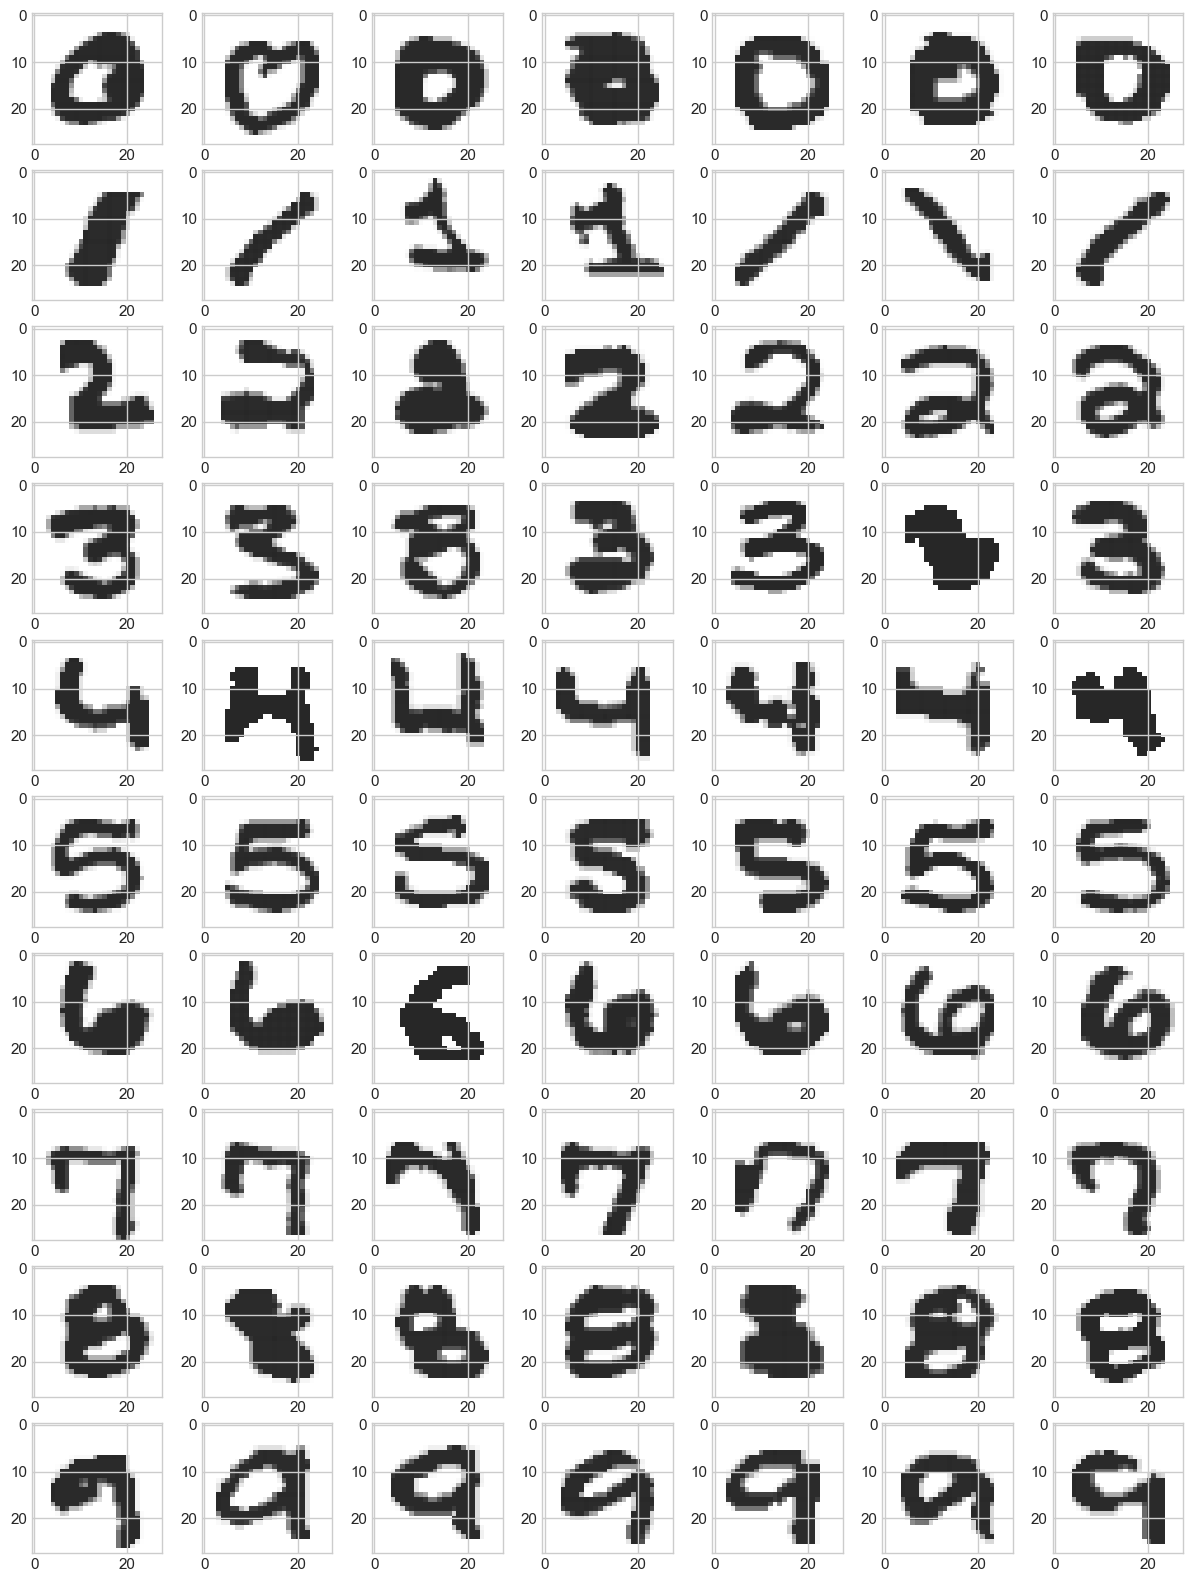

In [78]:
# for j in labels:
#     maxes = np.argpartition(distances2[j], -5)[-5:]
#     for i in range(len(distances)):
#         if j == mnist_train_labels[i]:
#             temp.append(distances[i])


# print(len(divide_pixels_by_labels[0]))
# print(len(distances2[0]))
fig = plt.figure(figsize=(15, 20))
fkme = []
fkme2=[]

for i in range(len(labels)):
    maxes = np.argpartition(distances2[i], -7)[-7:]
    for j in maxes:
        xx = divide_pixels_by_labels[i][j].astype('uint8')
        xx = np.reshape(xx, (28, 28))
        fkme.append(xx)
        fkme2.append(i)
        # print(j)
    # print("f")
    
    # print(fkme2[i])

ax=[]
for i in range(70):
    ax.append(fig.add_subplot(10, 7, i+1))
    # ax[-1].set_title("Label = " + str(fkme2[i]))  # set title
    plt.imshow(fkme[i], alpha=0.85)
plt.show()

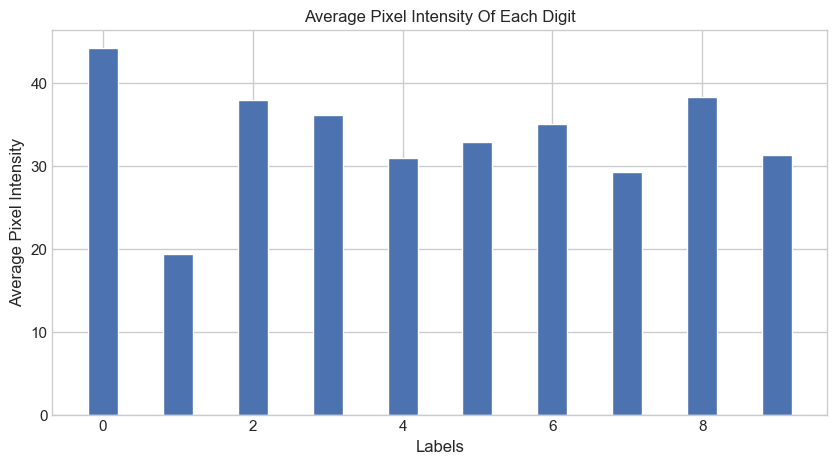

In [79]:
avg_intensities_train=[]
for i in range(len(labels)):
    avg_intensities_train.append([np.mean(image) for image in divide_pixels_by_labels[i]])

fkme3 = []
for i in range(10):
    fkme3.append(np.mean(avg_intensities_train[i]))

plt.bar(labels, fkme3,width = 0.4)
plt.xlabel("Labels")
plt.ylabel("Average Pixel Intensity")
plt.title("Average Pixel Intensity Of Each Digit")
plt.show()

# plt.style.use('seaborn-whitegrid')  # nice and clean grid
# plt.hist(fkme3[0], bins=10, facecolor='#2ab0ff',edgecolor='#169acf', linewidth=0.5)
# plt.title('Frequency Of Pixel Values')
# plt.xlabel('Pixel Value')
# plt.ylabel('Frequency')
# plt.show()

# Plot the bar chart of average intensities for training set
# plt.hist(avg_intensities_train, bins=20)
# plt.title('Average Intensities of MNIST Training Set')
# plt.xlabel('Intensity')
# plt.ylabel('Count')
# plt.show()

# fig = plt.figure(figsize=(10, 5))
# creating the bar plot
# plt.bar(labels, avg_intensities_train, color='maroon',
#         width=0.4)


Text(0, 0.5, 'Density')

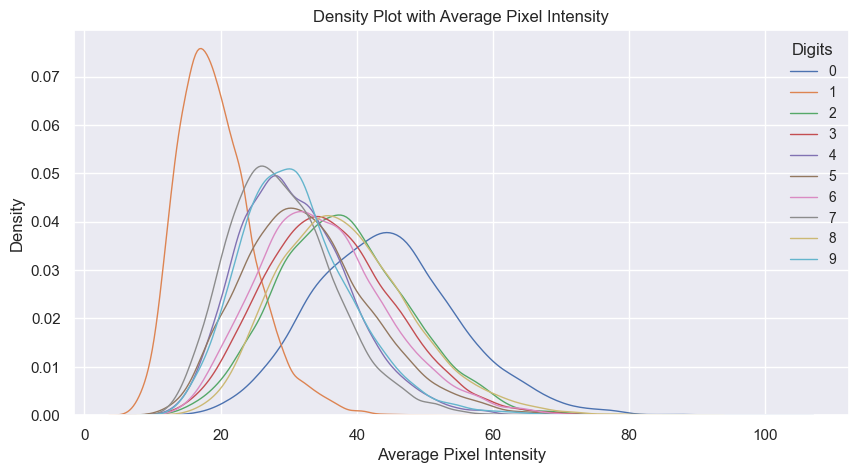

In [80]:
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize': (10, 5)})

for i in range(10):
    sns.distplot(avg_intensities_train[i], hist=False, kde=True,
                 kde_kws={'linewidth': 1},
                 label=i)

plt.legend(prop={'size': 10}, title='Digits')
plt.title('Density Plot with Average Pixel Intensity')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Density')


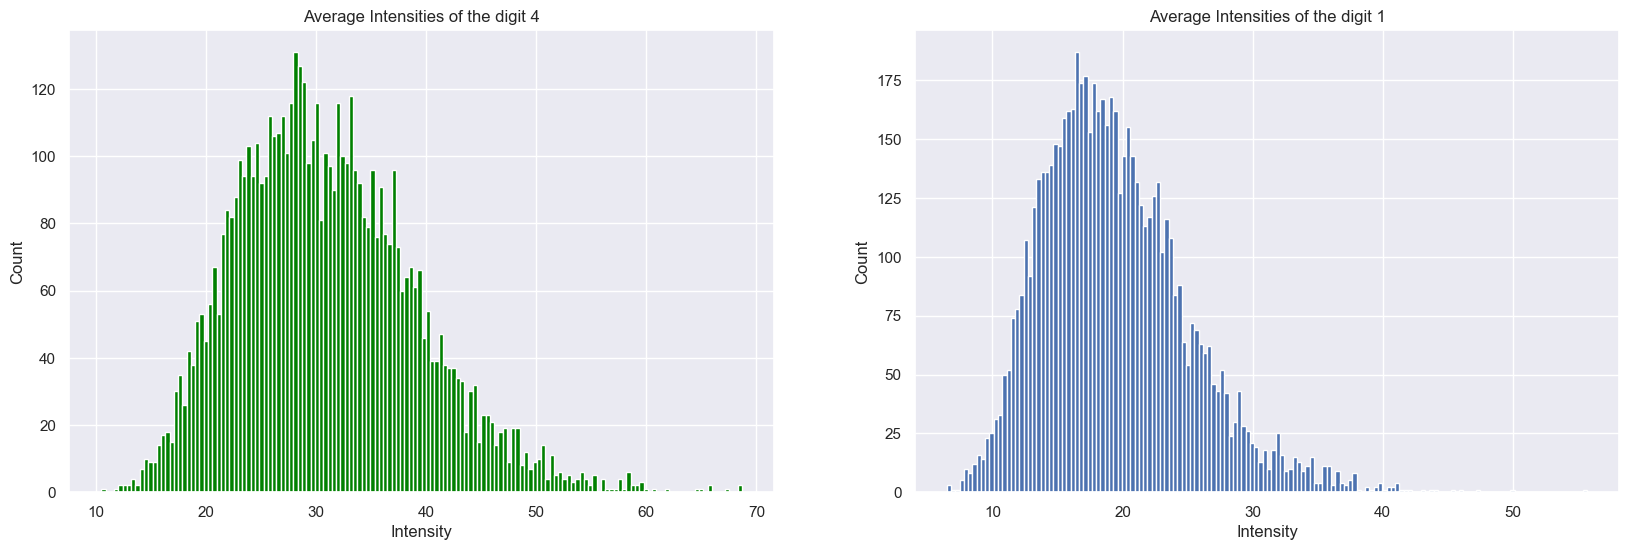

In [88]:
# Plot the bar chart of average intensities for training set
fig4 = plt.figure(figsize=(20, 6))
ax=[]

ax.append(fig4.add_subplot(1, 2, 1))
plt.hist(avg_intensities_train[4], bins=150,color="green")
plt.title('Average Intensities of the digit 4')
plt.xlabel('Intensity')
plt.ylabel('Count')

ax.append(fig4.add_subplot(1, 2, 2))
plt.hist(avg_intensities_train[1], bins=150)
plt.title('Average Intensities of the digit 1')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()
